# Blockchain-Tutorial

## Imports / configuration

In [1]:
import hashlib
import binascii
import datetime
import collections

Import der spezifischen Krypto-Funktionen

In [2]:
import Crypto
import Crypto.Random
from Crypto.Hash import SHA
from Crypto.PublicKey import RSA
from Crypto.Signature import PKCS1_v1_5

## Funktionen

### Verschiedene Hilfsfunktionen

In [3]:
def sha256(message):
    return hashlib.sha256(message.encode('ascii')).hexdigest()

In [4]:
def display_transaction(transaction):
    #for transaction in transactions:
    dict = transaction.to_dict()
    print ("sender: " + dict['sender'])
    print ('-----')
    print ("recipient: " + dict['recipient'])
    print ('-----')
    print ("value: " + str(dict['value']))
    print ('-----')
    print ("time: " + str(dict['time']))
    print ('-----')



In [5]:
def dump_blockchain(Chain):
    print("Number of blocks in the chain: " + str(len(Chain)))
    block_temp = Chain[len(Chain)-1]
    print("Last block :")
    print("Transaction tree hash")
    print(block_temp.root_hash)
    print("--------------")
    print("Nonce")
    print(block_temp.Nonce)
    print("--------------")
    print("Previous block hash")
    print(block_temp.previous_block_hash)
    print("=====================================")

### Mining-Funktion

In [6]:
def mine(message, difficulty=1):
    assert difficulty >= 1
    prefix = '1' * difficulty
    for i in range(10000000):
        my_hash = sha256(str(hash(message)) + str(i))
        if my_hash.startswith(prefix):
            print("After " + str(i) + " iterations found nonce: " + str(i))
            print("Hash: " + str(my_hash))
            print("Difficulty: " + str(difficulty))
            break
    return my_hash, i

### Klassen
Clients (wie in Server-Client). Kunden sind Instanzen mit:
- Einem Private-Key (wie z.B. das Smart-Card-Zertifikat)
- Einem Public-Key

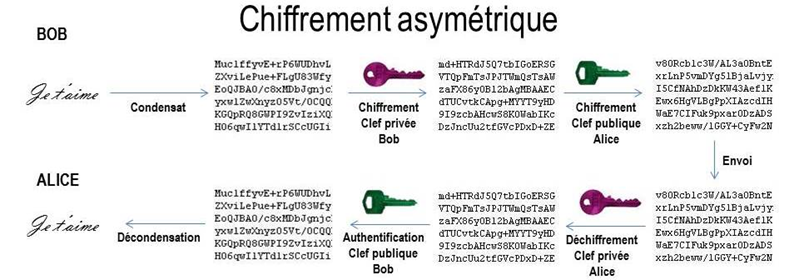

In [7]:
class Client:
    def __init__(self):
        self._private_key = RSA.generate(1024, Crypto.Random.new().read)
        self._public_key = self._private_key.publickey()
        self._signer = PKCS1_v1_5.new(self._private_key)

    @property
    def identity(self):
        return binascii.hexlify(self._public_key.exportKey(format='DER')).decode('ascii')

Klasse der Transaktionen. Jede Transaktion ist eine Instanz mit den folgenden Eigenschaften:
- Sender
- Empfänger
- Wert

In [8]:
class Transaction:
    def __init__(self, sender, recipient, value):
        self.sender = sender
        self.recipient = recipient
        self.value = value
        self.time = datetime.datetime.now()
    
    def to_ascii(self):
        my_str = ""
        # print(str(self.sender.identity))
        my_str = my_str + str(self.sender.identity)
        my_str = my_str + "&"
        # print(str(self.recipient))
        my_str = my_str + str(self.recipient)
        my_str = my_str + "&"
        # print(str(self.value))
        my_str = my_str + str(self.value)
        my_str = my_str + "&"
        # print(str(self.time))
        my_str = my_str + str(self.time)
        my_str = my_str + "&&"
        return my_str
    
    # in case of genesis, use this function
    def to_ascii_genesis(self):
        my_str = ""
        # print(str(self.sender.identity))
        my_str = my_str + str(self.sender)
        my_str = my_str + "&"
        # print(str(self.recipient))
        my_str = my_str + str(self.recipient)
        my_str = my_str + "&"
        # print(str(self.value))
        my_str = my_str + str(self.value)
        my_str = my_str + "&"
        # print(str(self.time))
        my_str = my_str + str(self.time)
        my_str = my_str + "&&"
        return my_str
    
    def to_dict(self):
        if self.sender == "Genesis":
            identity = "Genesis"
        else:
            identity = self.sender.identity

        return collections.OrderedDict({
            'sender': identity,
            'recipient': self.recipient,
            'value': self.value,
            'time' : self.time})

Ausserdem gibt es die sogenannten Blocks, die alle Transaktionen aufnehmen. Blöcke beinhalten folgende Information:
- Hash-Wert des vorherigen Blocks
- Hash-Baum der Transaktionen
- Nonce-Wert

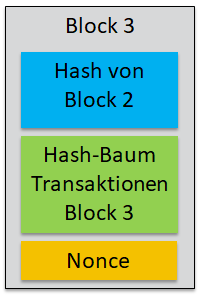

In [9]:
class Block:
    def __init__(self):
        self.root_hash = ""
        self.previous_block_hash = ""
        self.Nonce = ""
        
    def to_ascii(self):
        my_str = ""
        # print(str(self.root_hash))
        my_str = my_str + str(self.root_hash)
        my_str = my_str + "&"
        # print(str(self.previous_block_hash))
        my_str = my_str + str(self.previous_block_hash)
        my_str = my_str + "&"
        # print(str(self.Nonce))
        my_str = my_str + str(self.Nonce)
        my_str = my_str + "&&"
        return my_str

## Code

Globale Variabeln initialisieren
- Unser Blockchain (= eine Liste von Blocks)
- Liste mit Transaktionen für später
- Der Hash-Wert des letzten Blocks

In [10]:
BlockChain = []
transactions = []
last_block_hash = ""

### Clients schaffen

In [11]:
# clients
Benjamin = Client()        
Franziska = Client()
Stephanie = Client()
Steven = Client()

### Erste Transaktion

In [12]:
# initial transaction
t0 = Transaction ("Genesis", Benjamin.identity, 500.0)

In [13]:
display_transaction(t0)

sender: Genesis
-----
recipient: 30819f300d06092a864886f70d010101050003818d0030818902818100aceb20c51c1d397342822dc120ffa3462f7dced09d21ff91d7c09005a86b8e132998e07783b0272dd9df1fcfb17f88518ffe4a160b16e3723da2753ebb1fdaa764751a27cbea05b416499d71c9fe6348acdb3082ba8f128ead075a6ea38900de0170b0fc446201281781e2572fa919d4b9e37a13b86b8c527562c510472114070203010001
-----
value: 500.0
-----
time: 2020-08-14 13:43:05.287919
-----


### Block bilden

In [14]:
# create first block
block0 = Block()
block0.previous_block_hash = None
Nonce = None
block0.root_hash = sha256(t0.to_ascii_genesis())
digest = hash(block0.to_ascii())
last_block_hash = digest

# add the block to the chain
BlockChain.append(block0)

In [15]:
print(digest)

-5358686494204203882


### Transaktionen hinzufügen

Beispiele für Transaktionen

In [16]:
# Transaktion 0
transactions.append(Transaction(Benjamin, Franziska.identity, 5.0))
# Transaktion 1<
transactions.append(Transaction(Benjamin, Stephanie.identity, 6.0))
# Transaktion 2
transactions.append(Transaction(Franziska, Steven.identity, 2.0))
# Transaktion 3
transactions.append(Transaction(Stephanie, Franziska.identity, 4.0))
# Transaktion 4
transactions.append(Transaction(Steven, Stephanie.identity, 7.0))
# Transaktion 5
transactions.append(Transaction(Franziska, Stephanie.identity, 3.0))
# Transaktion 6
transactions.append(Transaction(Stephanie, Benjamin.identity, 8.0))
# Transaktion 7
transactions.append(Transaction(Stephanie, Franziska.identity, 1.0))

In [17]:
display_transaction(transactions[7])

sender: 30819f300d06092a864886f70d010101050003818d00308189028181009b00b87e538ca365cdfebab88ebe910d32a4213c753079221294cc9a346bd49c5c5614f472ee42ff1afd91231fdaa2baee132c5ea796b7252afc4c0ae7d07fbd4ed2936c1007d3ac455c7714201c68baf2556264ce6cf5c79451340cd15ec4cbe1756c44728c5720de322fcb6686a3a67ff0e43717bca5bdbcc0874659f61db90203010001
-----
recipient: 30819f300d06092a864886f70d010101050003818d0030818902818100b483f2133b6c1446b32263cbf7f92f8059ca7a4d7dbb5b4cbb273a8ffe53f3d17e1712b52b8cb66dfabe20acdfcaabaf38af9b7c3cf3181f48a848da77d1e65d65c798556b58dc82998003779a94de6df63033583bfaf9a96cb4242f36d074bbafcb0f6239ea92111af1d07e6f6c1a7bc3c13ed0cc4246a3d0c8be14343ac29b0203010001
-----
value: 1.0
-----
time: 2020-08-14 13:43:05.386422
-----


### Weiteren Block bilden

In [18]:
block = Block()

Transaktionen 1 bis 4 "hashen"

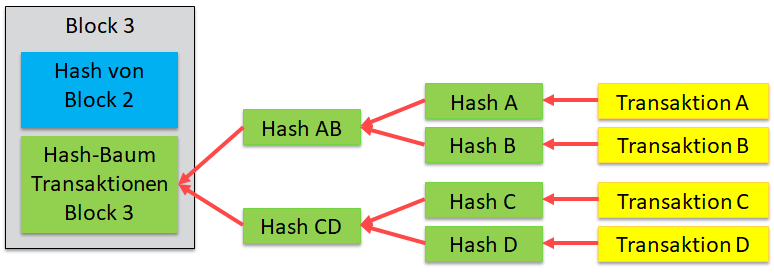

In [19]:
hash_A = sha256(transactions[0].to_ascii())
hash_B = sha256(transactions[1].to_ascii())
hash_C = sha256(transactions[2].to_ascii())
hash_D = sha256(transactions[3].to_ascii())

# Merkle Tree
hash_AB = sha256(str(hash_A)+str(hash_B))
hash_CD = sha256(str(hash_C)+str(hash_D))
hash_ABCD = sha256(str(hash_AB)+str(hash_CD))

print(hash_AB)

401d49036163fca21be787872e5d24e67ffee95870b93e6f959a6e54a3bedea3


Und dem Block hinzufügen...

In [20]:
block.previous_block_hash = last_block_hash
block.root_hash = hash_ABCD

print(block.root_hash)

25d57497d2e47537f393faea8c46d41ec64c6358d476cda62ea217ba54379b30


Mining

In [21]:
my_hash, block.Nonce = mine(block, 5)

After 423229 iterations found nonce: 423229
Hash: 11111368c70b0e20f45689c7199ed2256097f69906818a43447f9aed95ffde52
Difficulty: 5


In [22]:
BlockChain.append(block)
last_block_hash = my_hash

Wie sieht unsere Blockchain nun aus?

In [23]:
dump_blockchain(BlockChain)

Number of blocks in the chain: 2
Last block :
Transaction tree hash
25d57497d2e47537f393faea8c46d41ec64c6358d476cda62ea217ba54379b30
--------------
Nonce
423229
--------------
Previous block hash
-5358686494204203882


## Überprüfen einer Transaktion

In [24]:
my_transaction = Transaction(Franziska, Steven.identity, 2.0)
my_transaction.time = transactions[2].time

display_transaction(my_transaction)

sender: 30819f300d06092a864886f70d010101050003818d0030818902818100b483f2133b6c1446b32263cbf7f92f8059ca7a4d7dbb5b4cbb273a8ffe53f3d17e1712b52b8cb66dfabe20acdfcaabaf38af9b7c3cf3181f48a848da77d1e65d65c798556b58dc82998003779a94de6df63033583bfaf9a96cb4242f36d074bbafcb0f6239ea92111af1d07e6f6c1a7bc3c13ed0cc4246a3d0c8be14343ac29b0203010001
-----
recipient: 30819f300d06092a864886f70d010101050003818d00308189028181008fd0038cf7fa47e142be4855c156a60fb2885076de8811c8f536c6884e04b35ca26f517dd594d1a94558be537720c1d8823ea939f6987a019c811b058b9fc6f3923d90ff712301c47d69309775140d2ab2efbf83025187bcc3ae5d4ec51c256a4f85620c16e41fdbd12611514994ff73c290ffe515753e009c98d3ab08efcb070203010001
-----
value: 2.0
-----
time: 2020-08-14 13:43:05.386422
-----


## Rechnes des Hashes

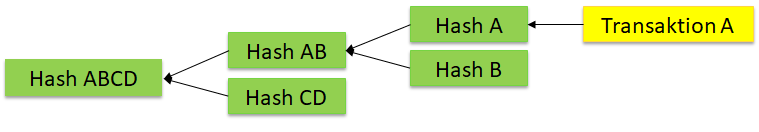

Anschliessender Vergleich

In [25]:
hash_C = sha256(my_transaction.to_ascii())

hash_CD = sha256(str(hash_C)+str(hash_D))
hash_ABCD = sha256(str(hash_AB)+str(hash_CD))

print(hash_ABCD)

25d57497d2e47537f393faea8c46d41ec64c6358d476cda62ea217ba54379b30


In [26]:
print(BlockChain[1].root_hash)

25d57497d2e47537f393faea8c46d41ec64c6358d476cda62ea217ba54379b30
